In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('seaborn')
import warnings 
warnings.filterwarnings('ignore')

C:\Users\91798\AppData\Local\Temp\ipykernel_16896\1801455139.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


# Loading Dataset

In [2]:
df = pd.read_csv('FeedGrains.csv')

In [3]:
df

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1926,3,Annual,69,Commodity Market Year,8.796000
1,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1927,3,Annual,69,Commodity Market Year,9.513000
2,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1928,3,Annual,69,Commodity Market Year,12.828000
3,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1929,3,Annual,69,Commodity Market Year,14.703000
4,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1930,3,Annual,69,Commodity Market Year,13.581000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505977,3,Exports and imports,9.0,Barley,300,1.02,Caribbean Basin (CBERA),77,Barley products,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2023,1,Monthly,5,May,0.004767
505978,3,Exports and imports,9.0,Barley,300,1.02,Caribbean Basin (CBERA),77,Barley products,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2023,1,Monthly,6,Jun,0.060129
505979,3,Exports and imports,9.0,Barley,300,1.02,Caribbean Basin (CBERA),77,Barley products,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2023,1,Monthly,7,Jul,0.021359
505980,3,Exports and imports,9.0,Barley,300,1.02,Caribbean Basin (CBERA),77,Barley products,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2023,1,Monthly,8,Aug,0.007153


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505982 entries, 0 to 505981
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SC_Group_ID                505982 non-null  int64  
 1   SC_Group_Desc              505982 non-null  object 
 2   SC_GroupCommod_ID          498700 non-null  float64
 3   SC_GroupCommod_Desc        498700 non-null  object 
 4   SC_Geography_ID            505982 non-null  int64  
 5   SortOrder                  505982 non-null  float64
 6   SC_GeographyIndented_Desc  505982 non-null  object 
 7   SC_Commodity_ID            505982 non-null  int64  
 8   SC_Commodity_Desc          505982 non-null  object 
 9   SC_Attribute_ID            505982 non-null  int64  
 10  SC_Attribute_Desc          505982 non-null  object 
 11  SC_Unit_ID                 505982 non-null  int64  
 12  SC_Unit_Desc               505982 non-null  object 
 13  Year_ID                    50

# Dealing with Duplicate Values

In [5]:
df.duplicated().sum()

0

# Splitting Numerical and Ctegorical Columns

In [6]:
df_num = df.select_dtypes(include = [np.number])
df_cat = df.select_dtypes(include = ['object'])

# Dealing with Null Values

In [7]:
df_num.isnull().sum()

SC_Group_ID             0
SC_GroupCommod_ID    7282
SC_Geography_ID         0
SortOrder               0
SC_Commodity_ID         0
SC_Attribute_ID         0
SC_Unit_ID              0
Year_ID                 0
SC_Frequency_ID         0
Timeperiod_ID           0
Amount                  0
dtype: int64

In [8]:
df_num.SC_GroupCommod_ID.fillna(df.SC_GroupCommod_ID.value_counts().idxmax(),inplace = True)

In [9]:
df_num.isnull().sum()

SC_Group_ID          0
SC_GroupCommod_ID    0
SC_Geography_ID      0
SortOrder            0
SC_Commodity_ID      0
SC_Attribute_ID      0
SC_Unit_ID           0
Year_ID              0
SC_Frequency_ID      0
Timeperiod_ID        0
Amount               0
dtype: int64

# Plotting Boxplot for all Numerical Columns

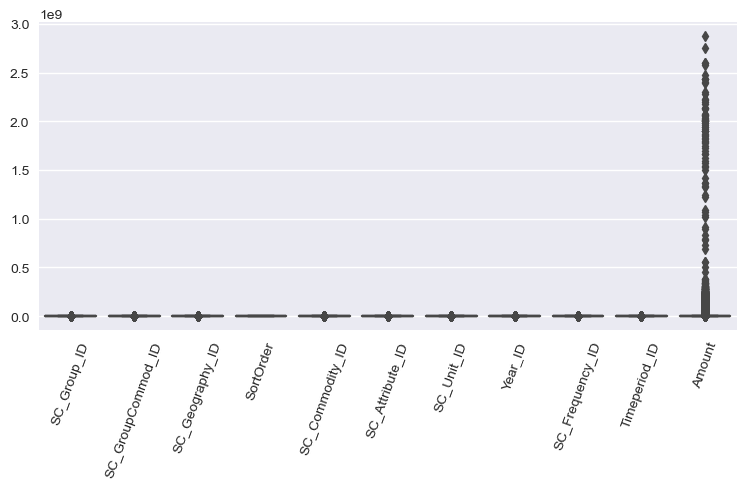

In [10]:
plt.figure(figsize = (9,4), dpi = 100)
sns.boxplot(data = df_num)
plt.xticks(rotation = 70)
plt.show()

# Removing the datapoints which are more than 75% and less than 25%

In [11]:
df_num.Amount.describe()

count    5.059820e+05
mean     7.188182e+05
std      2.458086e+07
min     -1.310973e+03
25%      6.612301e-02
50%      1.664000e+00
75%      3.544414e+01
max      2.872986e+09
Name: Amount, dtype: float64

# Plotting Boxplot before removal

<Axes: ylabel='Amount'>

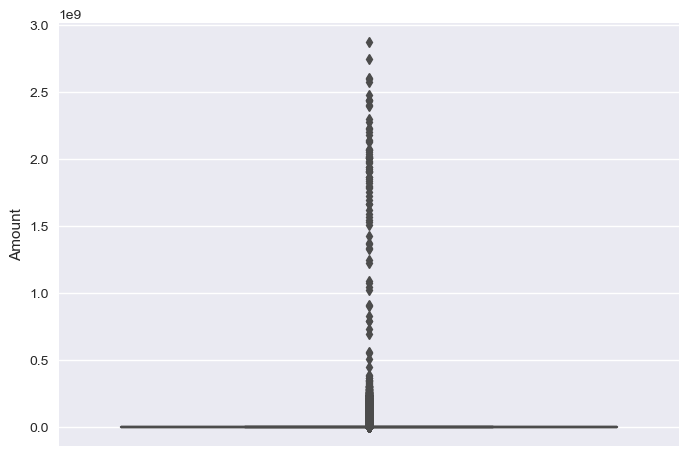

In [12]:
sns.boxplot(y = df_num.Amount)

In [13]:
df_a = df_num[(df_num.Amount>0.066)&(df_num.Amount<35.444)]

# Plotting Boxplot after removal

<Axes: ylabel='Amount'>

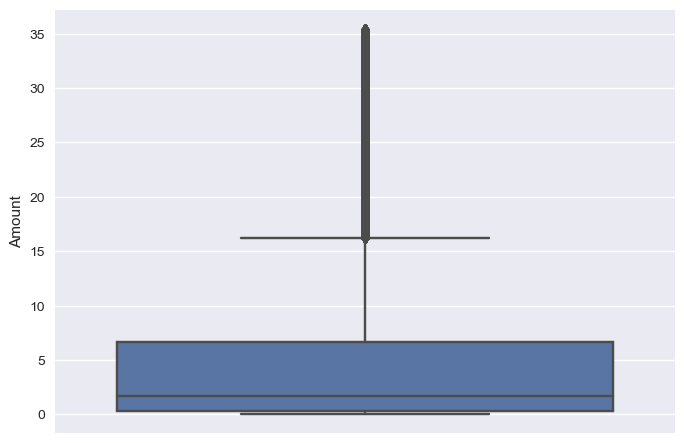

In [14]:
sns.boxplot(y = df_a.Amount)

# MinMax Scaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc=scaler.fit(df_a)
df_scaler= sc.fit_transform(df_a)

<Axes: >

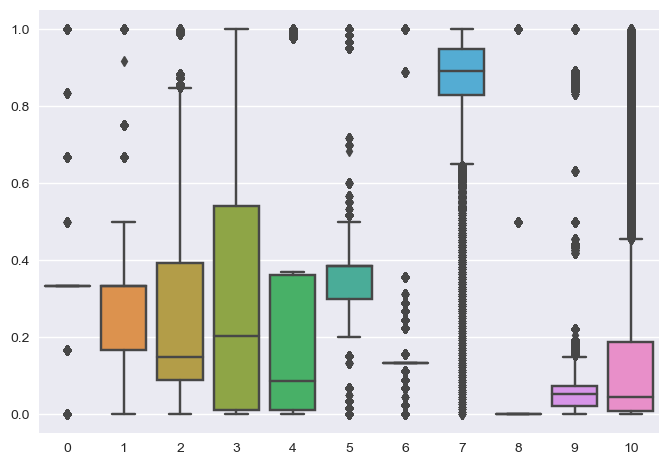

In [16]:
sns.boxplot(data=df_scaler)

# Categorical Values

In [17]:
df_cat

,SC_Group_Desc,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,SC_Frequency_Desc,Timeperiod_Desc
0,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,Annual,Commodity Market Year
1,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,Annual,Commodity Market Year
2,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,Annual,Commodity Market Year
3,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,Annual,Commodity Market Year
4,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,Annual,Commodity Market Year
...,...,...,...,...,...,...,...,...
505977,Exports and imports,Barley,Caribbean Basin (CBERA),Barley products,"Imports, to U.S. from specified source","1,000 metric tons",Monthly,May
505978,Exports and imports,Barley,Caribbean Basin (CBERA),Barley products,"Imports, to U.S. from specified source","1,000 metric tons",Monthly,Jun
505979,Exports and imports,Barley,Caribbean Basin (CBERA),Barley products,"Imports, to U.S. from specified source","1,000 metric tons",Monthly,Jul
505980,Exports and imports,Barley,Caribbean Basin (CBERA),Barley products,"Imports, to U.S. from specified source","1,000 metric tons",Monthly,Aug


# Dealing with Null Values

In [18]:
df_cat.isnull().sum()

SC_Group_Desc                   0
SC_GroupCommod_Desc          7282
SC_GeographyIndented_Desc       0
SC_Commodity_Desc               0
SC_Attribute_Desc               0
SC_Unit_Desc                    0
SC_Frequency_Desc               0
Timeperiod_Desc                 0
dtype: int64

In [19]:
df_cat.fillna(df_cat.SC_GroupCommod_Desc.value_counts().idxmax(),inplace = True)

In [20]:
df_cat.isnull().sum()

SC_Group_Desc                0
SC_GroupCommod_Desc          0
SC_GeographyIndented_Desc    0
SC_Commodity_Desc            0
SC_Attribute_Desc            0
SC_Unit_Desc                 0
SC_Frequency_Desc            0
Timeperiod_Desc              0
dtype: int64

# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cat=df_cat.apply(encoder.fit_transform)

In [22]:
df_cat

,SC_Group_Desc,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,SC_Frequency_Desc,Timeperiod_Desc
0,5,1,270,3,24,13,0,7
1,5,1,270,3,24,13,0,7
2,5,1,270,3,24,13,0,7
3,5,1,270,3,24,13,0,7
4,5,1,270,3,24,13,0,7
...,...,...,...,...,...,...,...,...
505977,1,1,249,7,22,2,1,31
505978,1,1,249,7,22,2,1,13
505979,1,1,249,7,22,2,1,12
505980,1,1,249,7,22,2,1,1


# Concatenate Numerical Values and Categorical Values

In [23]:
df_cat=df_cat.loc[df_a.index.values,:]
d1=pd.DataFrame(df_scaler,columns=df_a.columns)
d1.reset_index(inplace=True)
df_cat.reset_index(inplace=True)
df_final=pd.concat([d1,df_cat],axis=1)

# Final DataSet

In [24]:
df_final

,index,SC_Group_ID,SC_GroupCommod_ID,SC_Geography_ID,SortOrder,SC_Commodity_ID,SC_Attribute_ID,SC_Unit_ID,Year_ID,SC_Frequency_ID,...,Amount,index,SC_Group_Desc,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,SC_Frequency_Desc,Timeperiod_Desc
0,0,0.166667,0.083333,0.000000,0.002737,0.00000,0.000000,0.022222,0.382166,1.0,...,0.246770,0,5,1,270,3,24,13,0,7
1,1,0.166667,0.083333,0.000000,0.002737,0.00000,0.000000,0.022222,0.388535,1.0,...,0.267037,1,5,1,270,3,24,13,0,7
2,2,0.166667,0.083333,0.000000,0.002737,0.00000,0.000000,0.022222,0.394904,1.0,...,0.360742,2,5,1,270,3,24,13,0,7
3,3,0.166667,0.083333,0.000000,0.002737,0.00000,0.000000,0.022222,0.401274,1.0,...,0.413742,3,5,1,270,3,24,13,0,7
4,4,0.166667,0.083333,0.000000,0.002737,0.00000,0.000000,0.022222,0.407643,1.0,...,0.382027,4,5,1,270,3,24,13,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253054,253054,0.333333,0.166667,0.882006,0.003509,0.35545,0.383333,0.133333,1.000000,0.0,...,0.730388,505885,1,2,249,11,7,2,1,12
253055,253055,0.333333,0.166667,0.882006,0.003509,0.35545,0.383333,0.133333,1.000000,0.0,...,0.552109,505886,1,2,249,11,7,2,1,1
253056,253056,0.333333,0.166667,0.882006,0.003509,0.35545,0.383333,0.133333,1.000000,0.0,...,0.589986,505887,1,2,249,11,7,2,1,47
253057,253057,0.333333,0.083333,0.882006,0.003509,0.36019,0.300000,0.133333,0.783439,1.0,...,0.000353,505899,1,1,249,7,22,2,0,26


# Spliting the Dependent and Independent variables

In [25]:
x = df_final.drop('Amount',axis = 1)
y = df_final[['Amount']]

# Spliting the Data for Training(70%) and Testing(30%)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 50)

# LinearRegression Training Score

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lin = regressor.fit(x_train, y_train)
lin.score(x_train,y_train)

0.10615243444077316

# DecisionTreeRegressor Training Score¶

In [28]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
dec =regressor.fit(x_train,y_train)
dec.score(x_train,y_train)

1.0

# RandomForestRegressor Training Score

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, max_depth = 19)
ran = regressor.fit(x_train, y_train)
ran.score(x_train,y_train)

0.8628592574259073

# Model Validation

In [30]:
from sklearn.metrics import accuracy_score, r2_score

In [31]:
lr_y_pred = lin.predict(x_test)
dt_y_pred = dec.predict(x_test)
rf_y_pred = ran.predict(x_test)

# LinearRegression Testing Score

In [32]:
r2_score(y_test,lr_y_pred)

0.10886223583664711

# DecisionTreeRegressor Testing Score

In [33]:
r2_score(y_test,dt_y_pred)

0.5766795859092092

# RandomForestRegressor Testing Score

In [34]:
r2_score(y_test,rf_y_pred)

0.7284661612769172